# eQTL Analysis: R Code

## Sources
* Intructions on how to perform analysis in [eQTL Tutorial](https://rpubs.com/MajstorMaestro/349118).

* Data for analysis taken from bioRxiv paper's [Supplementary Materials](https://www.biorxiv.org/content/10.1101/2023.09.11.557157v1.supplementary-material).


## Preparations
In the Supplementary Materials, files for Table S11 (media-11.txt) and Table S12 (media-12.xlsx) were saved to a folder on our personal M drive.

In [1]:
rm(list=ls())
wd <- "//userfs/ma2016/w2k/YEAR 3/Project/Data and Code"
setwd(wd)

library("readr")

s11 <- read_tsv("Supplementary Materials/media-11.txt", skip = 8, show_col_types = FALSE)
s12 <- readxl::read_excel("Supplementary Materials/media-12.xlsx", sheet = "TPM filtered", .name_repair = "minimal")

`s11` was transformed to only contain position and sample of different variant genotypes.

In [2]:
gt <- as.data.frame(s11[-c(1,3:9)])
expr <- s12
colnames(expr)[1] <- "GENE"

Genotype conversion from 0|0, 1|1, 0|1, 1|0 to 0,1,2 form

In [3]:
for (i in 1:nrow(gt)){
  for (j in 2:ncol(gt)){
    if (gt[i,j] == "0|0"){
      gt[i,j] = 0
    }
    else if (gt[i,j] == "1|1"){
      gt[i,j] = 2
    }
    else{
      gt[i,j] = 1
    }
  }
}
gt <- as.data.frame(sapply(gt, as.numeric))

Removing variants that are heterozygous across almost all samples

In [4]:
index = c()
for (i in 1:nrow(gt)){
  if (length(grep(1, gt[i,-1]))>63){
    index <- append(index,i)}
}
gt <- gt[-index,]

Thresholding for variants which had above 0.05 frequency (this was redundant since all variants had a minor allele frequency of >0.05, which I think means Ethan preprocessed this)

In [5]:
gt.freq = rowMeans(gt[-1])/2 #allele (variant) freq.
threshold = 0.05 #the common threshold
gt <- gt[which(gt.freq > threshold),]

### Initial Plots
(FOLLOWING THE MEETING: Here are some plots I have managed to achieve before our meeting)

In [6]:
gt.vs.expr <- function(var, gene){
  plot(jitter(as.numeric(gt[var,-1]), factor=0.5), as.numeric(expr[gene,-1]),
       xlab = paste("Variant at position ",gt[var,1]),
       ylab = paste("(TPM) Expression of ",expr[gene,1]),
       main = "Genotype vs. Gene Expression",
       col = "steelblue",
       xlim = c(-0.5,2.5),
       xaxt = "n"
       )
  axis(1, at =c (0,1,2), labels = c("0", "1", "2"))
}

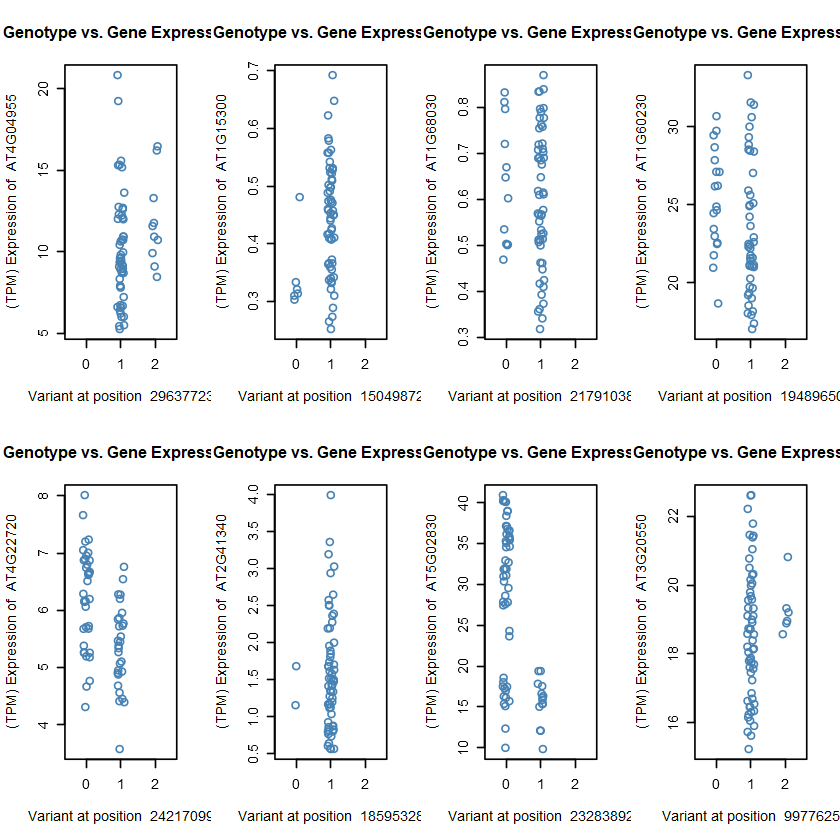

In [7]:
set.seed(1)
sample_var = round(runif(n=8, min=1, max=nrow(gt)), 0)
sample_gene = round(runif(n=8, min=1, max=nrow(expr)), 0)

par(mfrow = c(2, 4))

for (i in 1:8){
    gt.vs.expr(sample_var[i],sample_gene[i])
}